In [5]:
import pandas as pd
import numpy as np
import pybaseball as pyb
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Look up player
pyb.playerid_lookup('Gore','Mackenzie')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,gore,mackenzie,669022,gorem001,gorema01,22201,2022.0,2024.0


In [3]:
## Import statcast data

df = pyb.statcast_pitcher(start_dt = '2024-08-28',end_dt = '2024-08-29',player_id = 669022)
df.describe()

Gathering Player Data


,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
count,102.000000,102.000000,102.000000,102.000000,102.0,0.0,0.0,0.0,0.0,102.000000,...,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,46.000000,46.000000
mean,92.253922,1.851176,5.893725,622538.794118,669022.0,NaN,NaN,NaN,NaN,8.637255,...,3.549020,1.068627,3.549020,1.068627,3.549020,184.431373,0.001186,-0.014029,71.502277,7.165053
std,5.385085,0.179853,0.087063,62790.632269,0.0,NaN,NaN,NaN,NaN,4.070637,...,1.686448,0.678668,1.686448,0.678668,1.686448,77.206103,0.021221,0.209181,6.253050,0.963686
min,80.900000,1.460000,5.620000,518934.000000,669022.0,NaN,NaN,NaN,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,116.000000,-0.096000,-0.613000,49.025470,4.757100
25%,87.025000,1.700000,5.842500,592450.000000,669022.0,NaN,NaN,NaN,NaN,5.000000,...,2.000000,1.000000,2.000000,1.000000,2.000000,145.000000,0.000000,-0.072500,68.480560,6.608570
50%,95.700000,1.870000,5.900000,657077.000000,669022.0,NaN,NaN,NaN,NaN,9.000000,...,4.000000,1.000000,4.000000,1.000000,4.000000,151.000000,0.000000,-0.023000,72.279115,7.006995
75%,96.700000,1.997500,5.957500,665862.000000,669022.0,NaN,NaN,NaN,NaN,13.000000,...,5.000000,2.000000,5.000000,2.000000,5.000000,159.000000,0.000000,0.034750,74.637670,7.658545
max,98.500000,2.190000,6.090000,683011.000000,669022.0,NaN,NaN,NaN,NaN,14.000000,...,5.000000,2.000000,5.000000,2.000000,5.000000,345.000000,0.104000,1.000000,82.691230,9.963080


Text(0.5, 1.0, 'Mackenzie Gore Pitch Movement Plot')

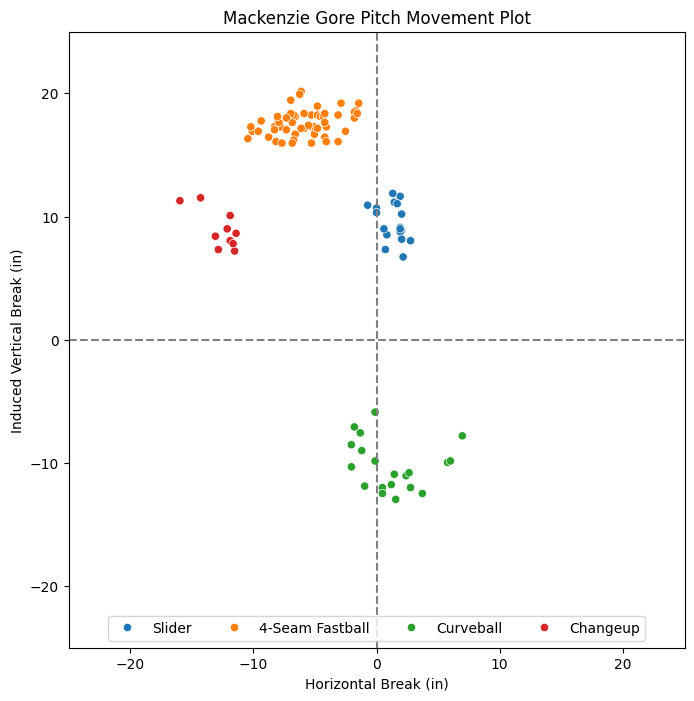

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x = df['pfx_x']*-12 , y = df['pfx_z']*12, hue= df['pitch_name'], ax = ax)
#scatter.axis('equal')
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)
ax.vlines(x=0,ymin=-25,ymax=25,color='grey',linestyle='--')
ax.hlines(y=0,xmin=-25,xmax=25,color='grey',linestyle='--')
ax.set_xlabel('Horizontal Break (in)')
ax.set_ylabel('Induced Vertical Break (in)')
ax.legend(loc=8,ncol=4)

ax.set_aspect('equal', adjustable='box')
ax.set_title('Mackenzie Gore Pitch Movement Plot')